# Understanding Heart Disease with Machine Learning and Statistical Techniques

## Import the libraries

In [30]:
# import necessary libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

## Loading Data 

In [31]:
# checking for the encoding for csv files
import chardet

data_path = 'dataset/heart.csv'
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [32]:
# load the data
df = pd.read_csv(data_path, encoding=result['encoding'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,1


## Initial Data Exploration

- Understanding data structure
- Checking missing values

### Data Descriptions / Metadata
1. age => age of patients
2. sex => gender of patients (1 = male; 0 = female)
3. cp => chest pain type (4 values)
4. trestbps => resting blood pressure
5. chol => serum cholestoral in mg/dl
6. fbs => fasting blood sugar > 120 mg/dl
7. restecg => resting electrocardiographic results (values 0,1,2)
8. thalach => maximum heart rate achieved
9. exang => exercise induced angina (1 = yes; 0 = no)
10. oldpeak => ST depression induced by exercise relative to rest
11. slope => the slope of the peak exercise ST segment
12. ca => number of major vessels (0-3) colored by flourosopy
13. thal => (0 = normal; 1 = fixed defect; 2 = reversable defect)
14. target => presence of heart disease in the patient (0 = normal; 1 = detected)
    

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [33]:
df_description = pd.read_csv('dataset/heart-glossary.csv')
df_description

,Column,Source,Description,Remarks
0,age,UCI Machine Learning Repository,Age of patient,Unit in Years
1,sex,UCI Machine Learning Repository,"Sex of the patient (Male, Female)",Male or Female
2,cp,UCI Machine Learning Repository,Chestpain Type,"Typical Angina (TA), Atypical Angina (ATA), No..."
3,tresbps,UCI Machine Learning Repository,Resting blood pressure (On admission to the ho...,Unit in mm Hg
4,chol,UCI Machine Learning Repository,Serum cholesterol,Unit in mm/dl
5,fbs,UCI Machine Learning Repository,Fasting blood sugar. More than 120mg/dl consid...,>120mg/dl or <=120mg/dl
6,restecg,UCI Machine Learning Repository,Resting electrocardiogram results,"Normal, ST-T wave abnormality, Left ventricula..."
7,thalach,UCI Machine Learning Repository,MaxHR: maximum heart rate achieved,Numeric value between 60 and 202
8,exang,UCI Machine Learning Repository,ExerciseAngina: exercise-induced angina,Yes or No
9,oldpeak,UCI Machine Learning Repository,ST depression induced by exercise relative to ...,Numeric value measured in depression


#### Understanding data structure

In [34]:
#check unique column
df.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
# Check unique values for selected columns
for feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'target']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

sex 2 unique values are: [1 0]
cp 4 unique values are: [0 1 2 3]
fbs 2 unique values are: [0 1]
restecg 3 unique values are: [1 0 2]
exang 2 unique values are: [0 1]
ca 5 unique values are: [2 0 1 3 4]
thal 4 unique values are: [3 2 1 0]
target 2 unique values are: [0 1]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [38]:
# change data type to categorical for 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal'
# list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# df[list] = df[list].astype('category')
# df.info()

#### Check Missing Values

In [39]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


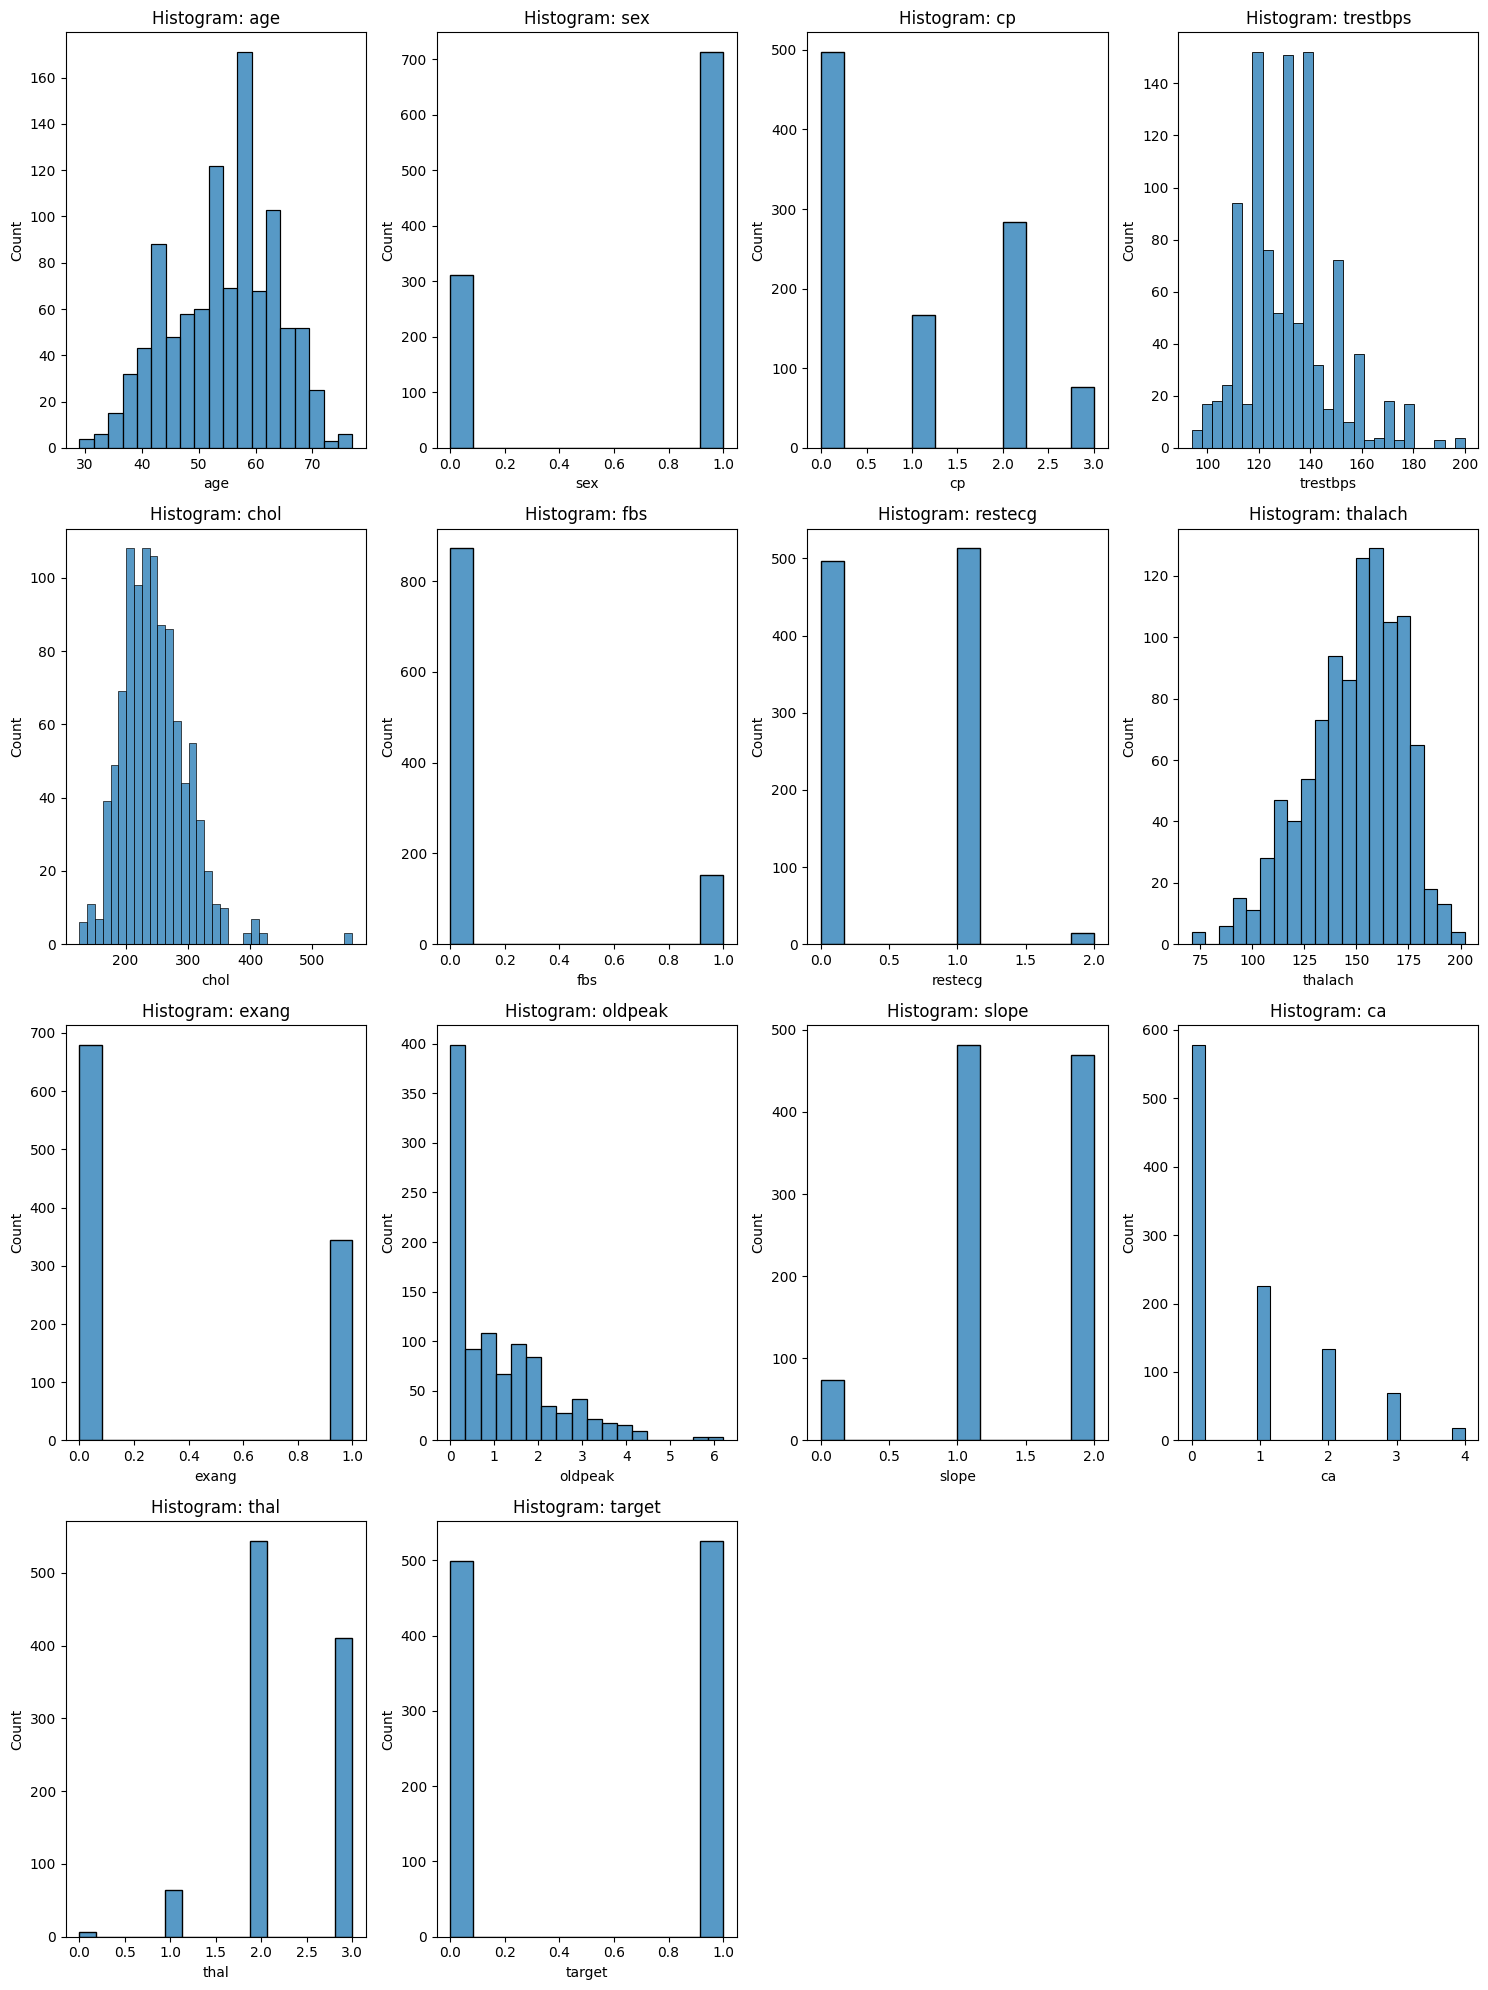

In [40]:
# overview of data in histogram
df_h = df.copy()
num_plots = len(df_h.columns)
columns_per_row = 4
num_rows = math.ceil(num_plots / columns_per_row)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    sns.histplot(df_h[col], ax=axes[i])
    axes[i].set_title(f'Histogram: {col}')

# Remove extra axes
for j in range(num_plots, num_rows * columns_per_row):
    axes[j].remove()

plt.tight_layout()
plt.show()

#### Findings from the Initial Data Exploration

There are missing values?? What are the dimensions etc...

## Exploratory Data Analysis (EDA)
- Checking outliers
- Data cleaning
- Data correlation
- Data visualization for deeper analysis
- Data transformation

### Checking outliers
Violin plot, boxplot and histogram are the common graphs to find outliers. We'll create the function for all these graphs for easier accessibility.

In [41]:
# Define a function to create violin plots for multiple columns
def plot_violin(df, columns, columns_per_row=3):
    """
    Creates a grid of violin plots for multiple columns in a DataFrame.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - columns (list): List of column names to create violin plots for.
        - columns_per_row (int): Number of columns to display per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.violinplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Violin Plot: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

In [42]:
# Define a function to create box plots for multiple columns
def plot_box(df, columns, columns_per_row=3):
    """
    Creates a grid of violin plots for multiple columns in a DataFrame.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - columns (list): List of column names to create box plots for.
        - columns_per_row (int): Number of columns to display per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

In [43]:
def plot_histogram(df, columns, columns_per_row=3):
    """
    Plot histograms for multiple columns in a grid layout with grids and distribution lines.

    Parameters:
        -- df (pd.DataFrame): The DataFrame containing the data to be plotted.
        -- columns (list): The list of column names for which histograms are to be plotted.
        -- columns_per_row (int): The number of columns to be displayed per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], ax=axes[i], kde=True, color='steelblue')
        axes[i].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
        axes[i].set_title(f'Histogram: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

In [44]:
# check outliers for continuos columns
df_out = df.copy()
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

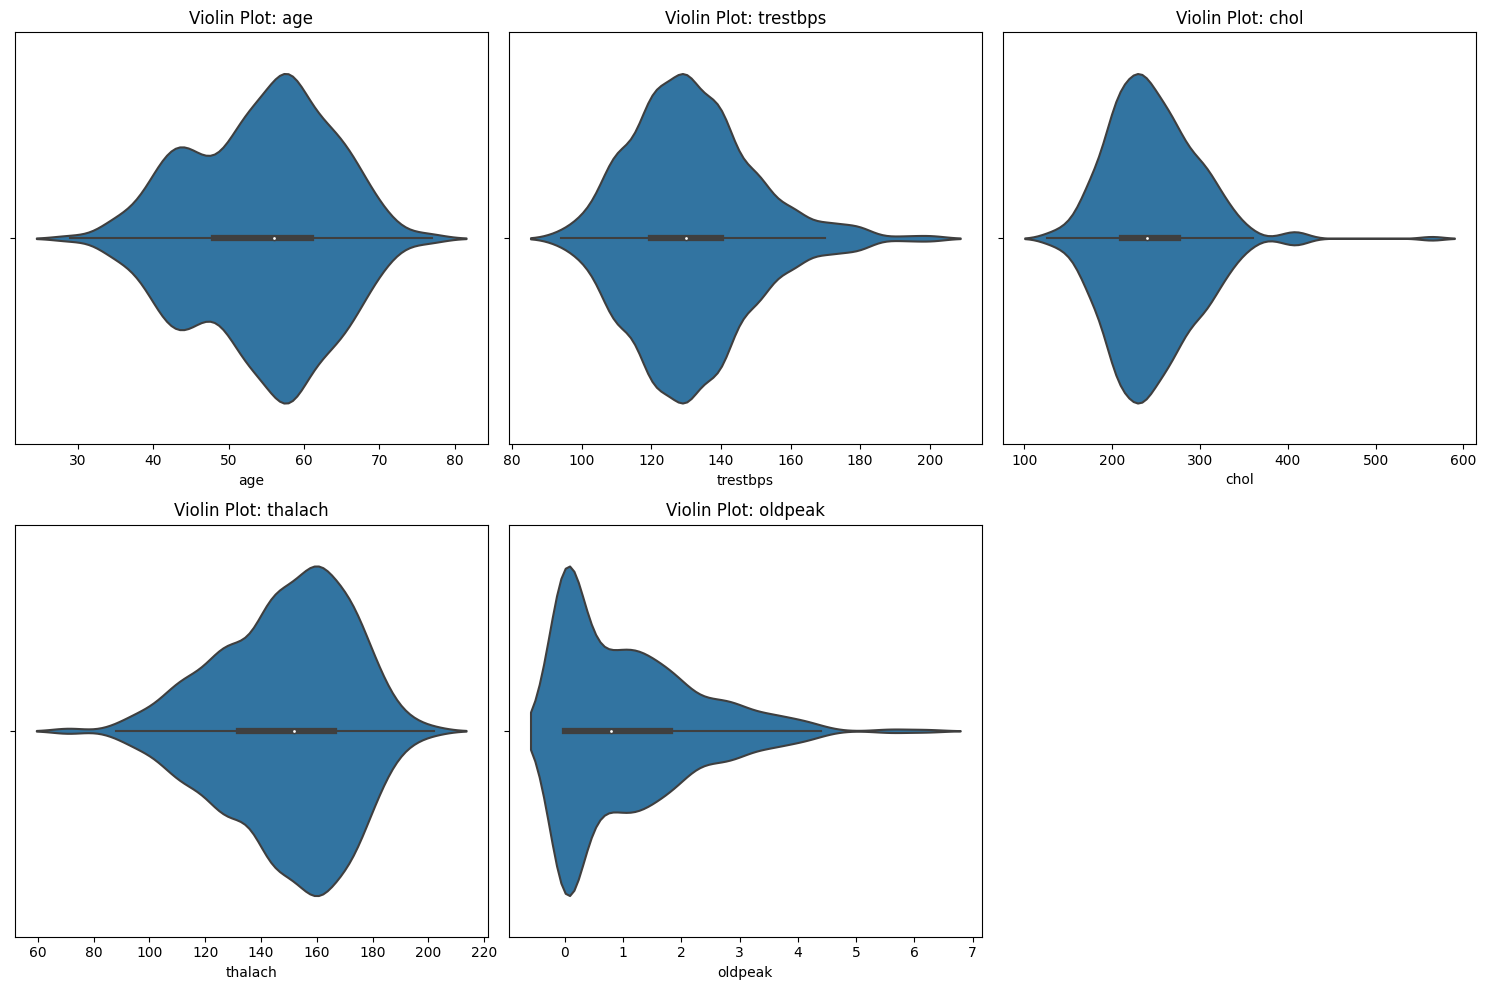

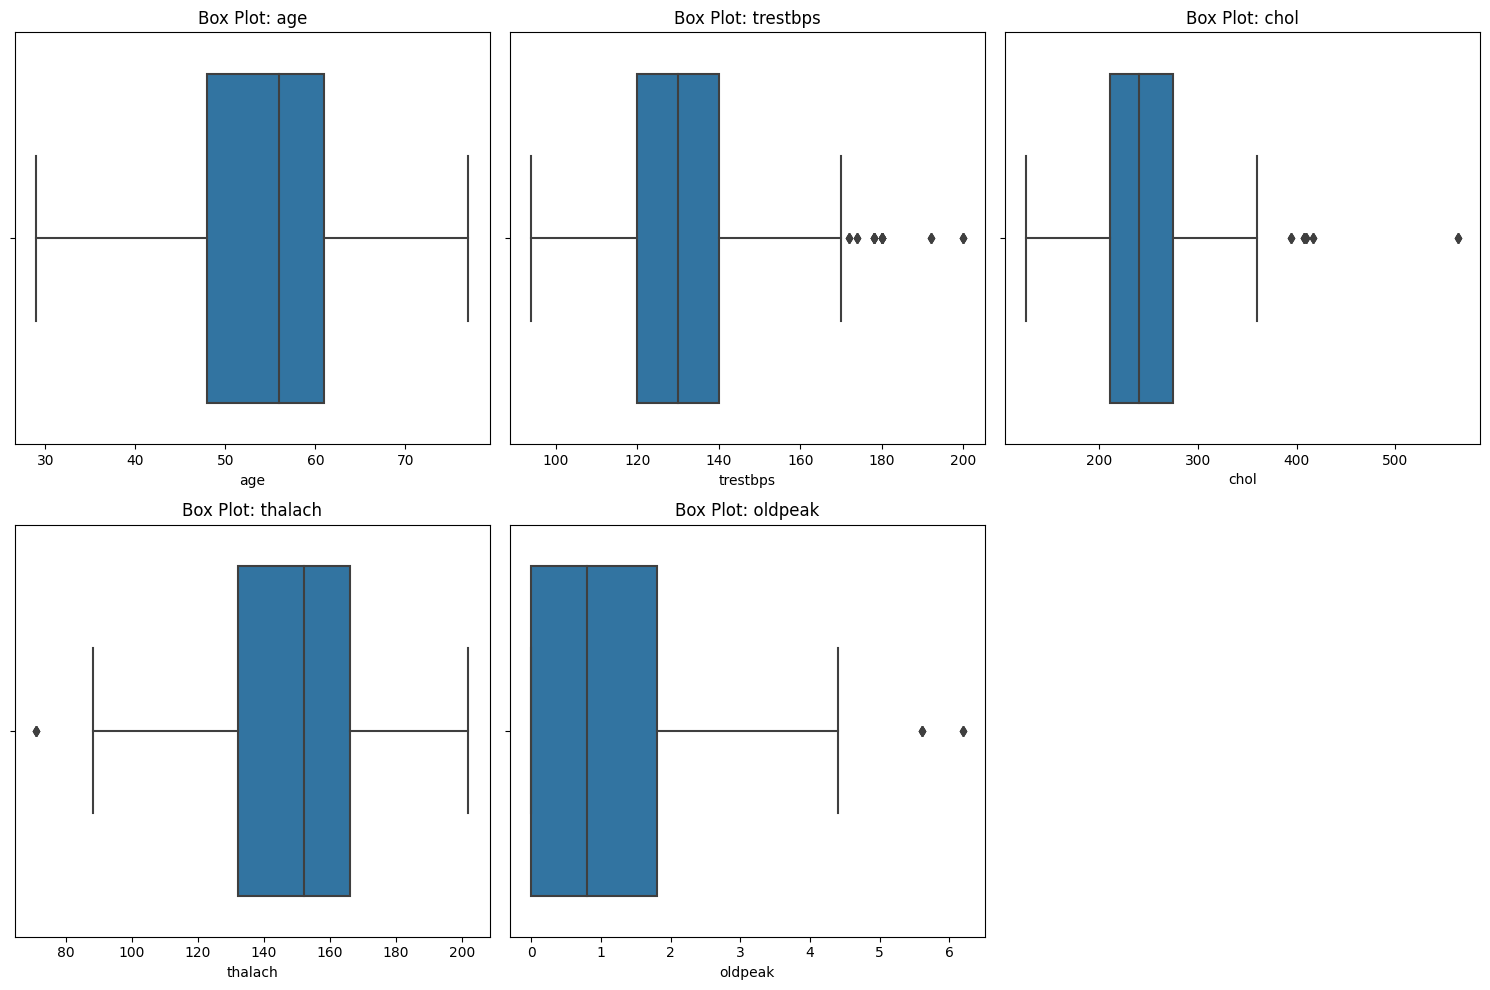

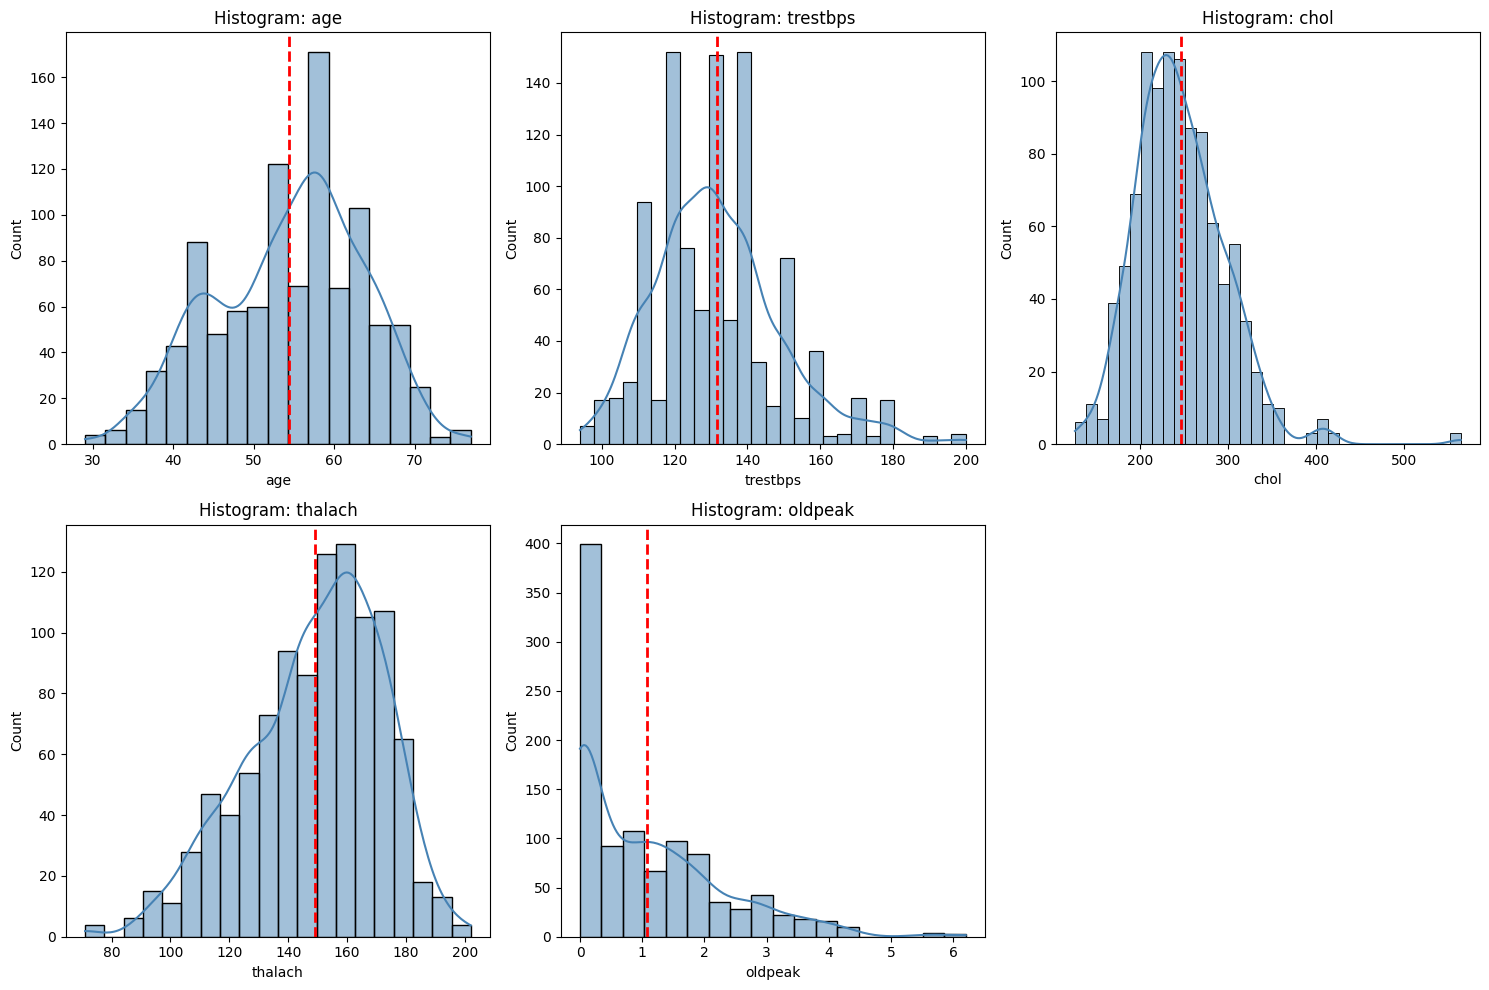

In [45]:
# show violin plotin & boxplot
plot_violin(df_out, selected_columns)
plot_box(df_out, selected_columns)
plot_histogram(df_out, selected_columns)

From the above plots, we can visualize there are outliers in 'trestbps', 'chol', 'thalach' and 'oldpeak'. We need to fix these outliers to achieve better data quality and better results.

#### Data Cleaning
Fix the outliers using imputation with mean, median or mode. Justify your analysis.

### Data Correlation

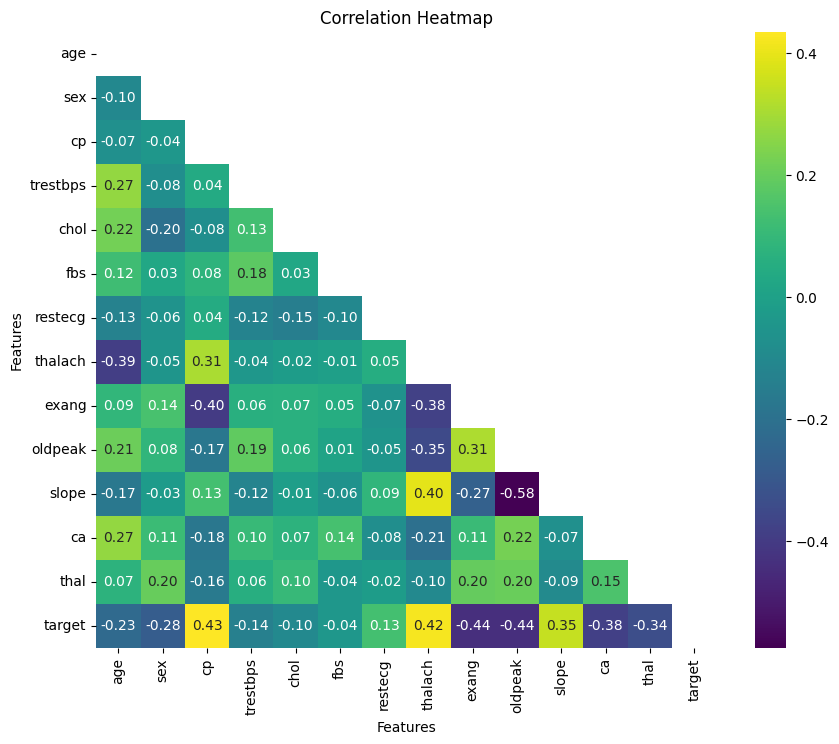

In [46]:
# Create a copy of the DataFrame for correlation
df_corr = df.copy()
df_corr = df_corr.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr[mask] = np.nan

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f", cmap="viridis", cbar=True, ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Heatmap")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Show the plot
plt.show()

In [47]:
## Check features correlation to target
# df_corr["target"].abs().sort_values(ascending=False)

From the correlation heatmap, `fbs` has the least correlation coefficient to target

#### Data Visualization for Deeper Analysis
Let's try to investigate deeper on the relationship between two specific columns by refering on the question below:
1. Which gender has higher chance of getting heart disease?
2. Which chest pain type has highest possibilities to lead to heart disease?
3. Which major vessels number tend to detected as heart disease?
4. Which fields has the positive correlation to the patient age?

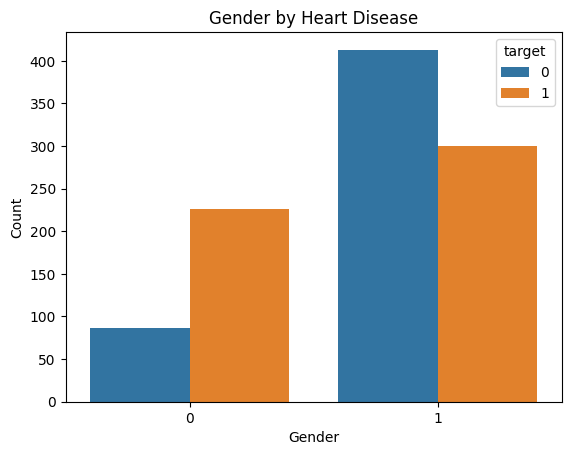

In [48]:
# Which gender has higher chance of getting heart disease?
df_gen_tar = df.copy()

# Convert 'sex' and 'target' columns to appropriate data types
df_gen_tar['sex'] = df_gen_tar['sex'].astype(object)
df_gen_tar['target'] = df_gen_tar['target'].astype('category')

# Group by 'sex' and 'target' columns and count occurrences
df_gen_tar = df_gen_tar.groupby(['sex', 'target'], as_index=False)['age'].count()

# Create column chart using Seaborn
sns.barplot(x='sex', y='age', hue='target', data=df_gen_tar)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender by Heart Disease')
plt.show()

Male tends to have higher chance of getting heart disease than female.

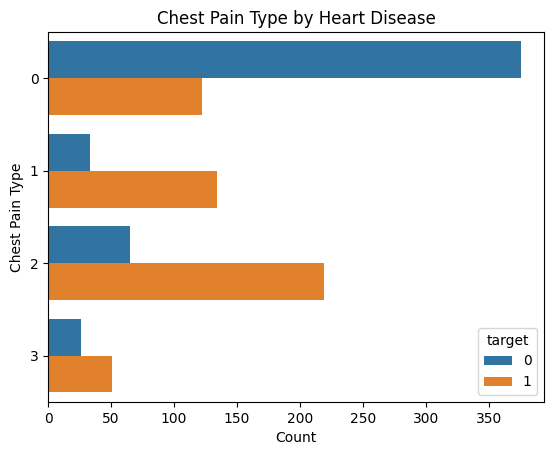

In [49]:
# Which chest pain type has highest possibilities to lead to heart disease?
df_cp_tar = df.copy()

# Convert 'cp' and 'target' columns to appropriate data types
df_cp_tar['cp'] = df_cp_tar['cp'].astype(object)
df_cp_tar['target'] = df_cp_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_cp_tar = df_cp_tar.groupby(['cp', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='cp', hue='target', data=df_cp_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.title('Chest Pain Type by Heart Disease')
plt.show()

Chest pain type (2) has the higest likelihood to be detected as heart disease

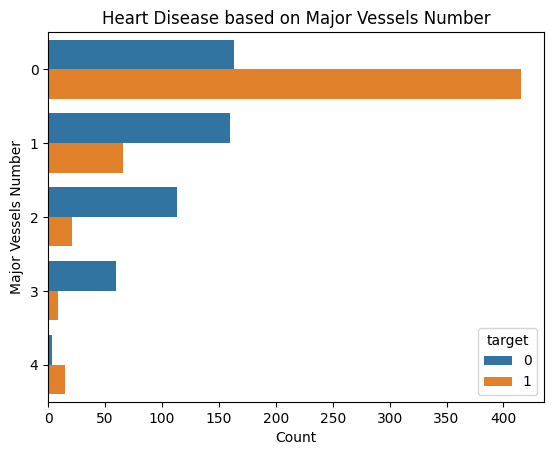

In [50]:
# Which major vessels number tend to detected as heart disease?
df_ca_tar = df.copy()

# Convert 'ca' and 'target' columns to appropriate data types
df_ca_tar['ca'] = df_ca_tar['ca'].astype(object)
df_ca_tar['target'] = df_ca_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_ca_tar = df_ca_tar.groupby(['ca', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='ca', hue='target', data=df_ca_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Major Vessels Number')
plt.title('Heart Disease based on Major Vessels Number')
plt.show()

Patient from 1 to 3 less likely to get heart disease on major vessels numbers while patient with 0 and 4 tend to get heart disease

In [51]:
def scatter_plot_with_correlation(x, y, title=None):
    """
    Create a scatter plot with correlation line.
    
    Parameters:
        - x: array-like, x-axis data
        - y: array-like, y-axis data
        - title: str, title for the plot (optional)
    """
    # Create scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Calculate correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Add correlation line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linestyle='--', label=f'Correlation: {corr_coef:.2f}')
    
    # Set plot title and labels
    if title:
        plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

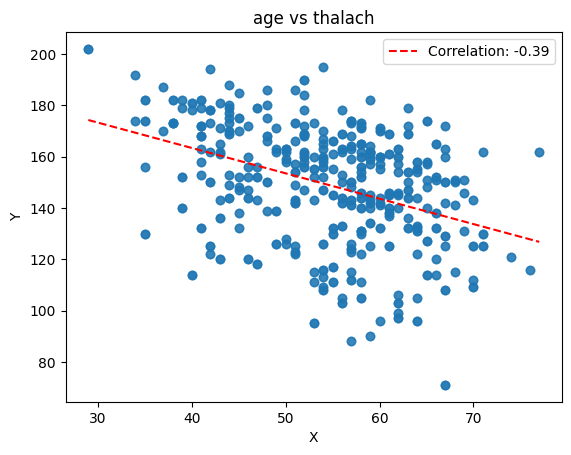

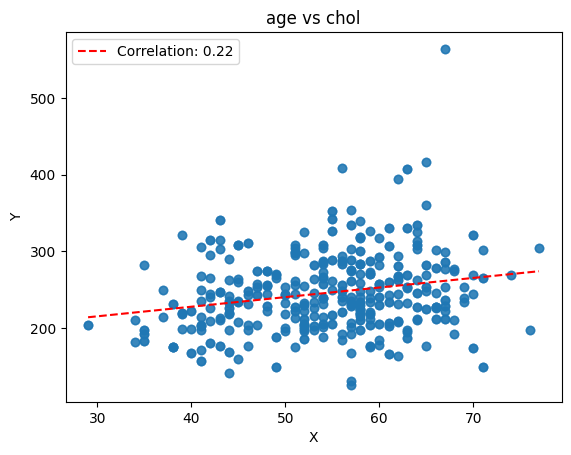

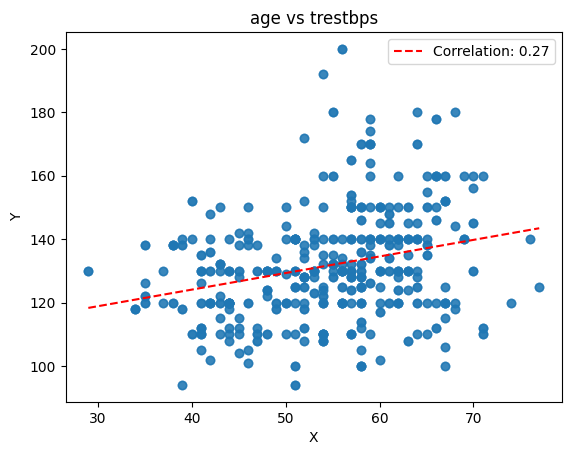

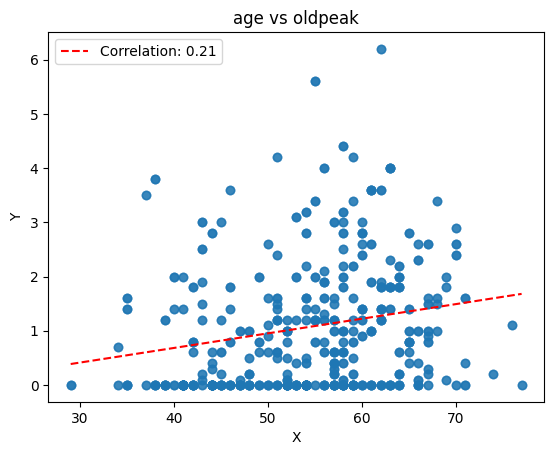

In [52]:
# Create a scatter plot to visualize the relationship between two numerical variables
df_scatter = df.copy()
scatter_plot_with_correlation(df_scatter['age'], df_scatter['thalach'], title='age vs thalach')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['chol'], title='age vs chol')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['trestbps'], title='age vs trestbps')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['oldpeak'], title='age vs oldpeak')

#### Findings from the scatter plots
From the scatter plots, 'trestbps', 'chol' and 'oldpeak' has higher correlation with the patient age but 'thalach' no

## Machine Learning

In [53]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# copy df
df_lp = df.copy()

# separate features and target variable
X = df_lp.drop('target', axis=1)
y = df_lp['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# fit and predict using multiple machine learning models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the accuracy score of each model
print(models)

100%|██████████| 29/29 [00:01<00:00, 24.22it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                1.00               1.00     1.00      1.00   
LGBMClassifier                     0.99               0.99     0.99      0.99   
LabelPropagation                   0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
BaggingClassifier                  0.99               0.99     0.99      0.99   
LabelSpreading                     0.99               0.99     0.99      0.99   
SVC                                0.89               0.89     0.89      0.89   
AdaBoostClassifier          

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib

# copy df
df_dt = df.copy()

# separate features and target variable
X = df_dt.drop('target', axis=1)
y = df_dt['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.9853658536585366
F1 Score: 0.9852216748768473
Confusion Matrix:
 [[102   0]
 [  3 100]]


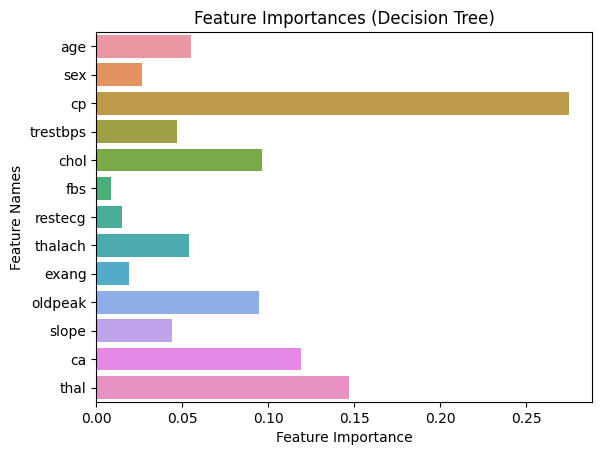

In [55]:
# Access feature importances from the trained model (Decision Tree, Random Forest)
feature_importances = clf.feature_importances_

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances (Decision Tree)')
plt.show()

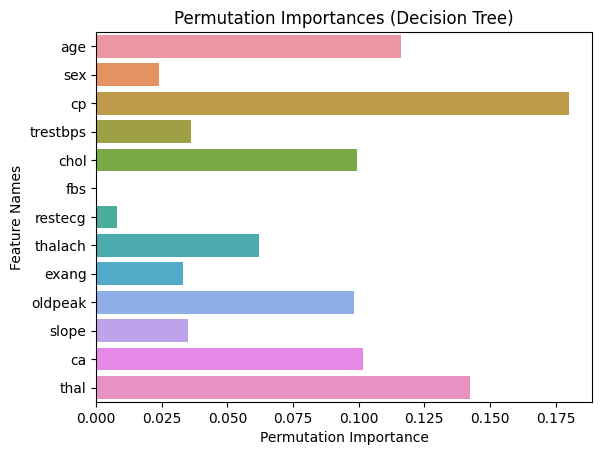

In [56]:
from sklearn.inspection import permutation_importance

# Compute permutation importances (Logistic regression, SVMs)
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Access feature importances from permutation importances
feature_importances = result.importances_mean

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Names')
plt.title('Permutation Importances (Decision Tree)')
plt.show()

In [57]:
# save the model
joblib.dump(clf, 'trained_model/decision_tree_model.joblib')

['trained_model/decision_tree_model.joblib']

In [58]:
# test with trained model

# test model with only features
X = np.array([58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2]).reshape(1, -1)

# load the trained model
clf = joblib.load('trained_model/decision_tree_model.joblib')

# make predictions using the loaded model
y_pred = clf.predict(X)

predicted_labels = ['detected' if pred == 1 else 'not-detected' for pred in y_pred]

# print the predictions
print('Predictions:', predicted_labels)

Predictions: ['detected']
